In [11]:
import pandas as pd

# Read diabetes.csv
df1 = pd.read_csv('/kaggle/input/diabetes11/diabetes.csv')

# Read diabetic_data.csv
df2 = pd.read_csv('/kaggle/input/diabetes11/diabetic_data.csv')

# Display top rows of each
print("== diabetes.csv ==")
print(df1.head())

print("\n== diabetic_data.csv ==")
print(df2.head())


== diabetes.csv ==
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

== diabetic_data.csv ==
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAme

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.ensemble import RandomForestClassifier
import joblib  


In [13]:
# Step 2: Load the Dataset
df = pd.read_csv('/kaggle/input/diabetes11/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

<Axes: xlabel='Outcome', ylabel='count'>

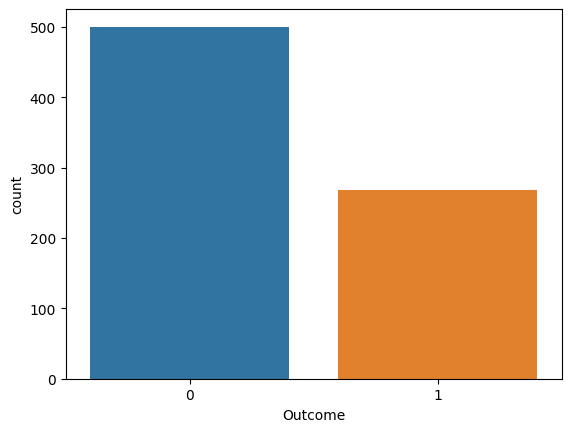

In [14]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
sns.countplot(data=df, x='Outcome')


In [15]:
# Step 4: Data Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler for future use
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [16]:
# Step 5: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [17]:
# Step 6: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'diabetes_model.pkl')


['diabetes_model.pkl']

Accuracy: 0.7597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



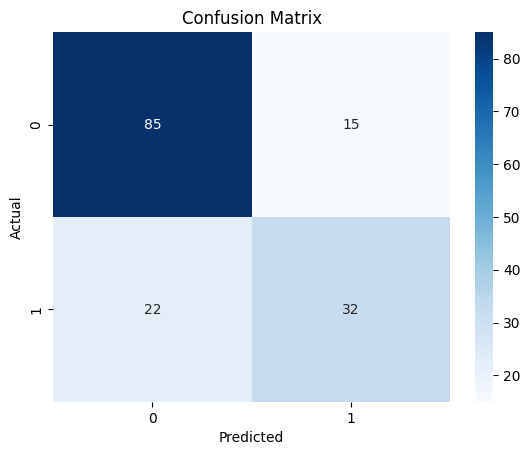

In [18]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Step 8: Inference (Prediction Example)
# Load model and scaler
loaded_model = joblib.load('diabetes_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# New data point
sample = np.array([[5,116,74,0,0,25.6,0.201,30]])  # Replace with real values
sample_scaled = loaded_scaler.transform(sample)

pred = loaded_model.predict(sample_scaled)
print("Prediction (0: No Diabetes, 1: Diabetes):", pred[0])


Prediction (0: No Diabetes, 1: Diabetes): 0


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
